<a href="https://colab.research.google.com/github/Maham-Saleem12/m/blob/main/ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving audit_data.csv to audit_data.csv


In [2]:
#Dependencies
import numpy as np
import pandas as pd
#dataset import
dataset = pd.read_csv('audit_data.csv') #You need to change #directory accordingly
dataset.head(10) #Return 10 rows of data

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
5,3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,0.2,1.0,2.95,0.2,0.590,2,0.2,0.4,0,0.2,0.0,2.0,2.156,0.4,0.5,0.4312,0
6,3.89,7,1.10,0.4,0.440,7.41,0.4,2.964,8.51,5.0,0.2,1.0,44.95,0.6,26.970,2,0.2,0.4,0,0.2,0.0,3.2,31.774,0.4,0.5,6.3548,1
7,3.89,8,8.50,0.6,5.100,12.03,0.6,7.218,20.53,5.5,0.4,2.2,7.79,0.4,3.116,2,0.2,0.4,0,0.2,0.0,4.2,18.034,0.4,0.5,3.6068,1
8,3.89,8,8.40,0.6,5.040,11.05,0.6,6.630,19.45,5.5,0.4,2.2,7.34,0.4,2.936,2,0.2,0.4,0,0.2,0.0,4.2,17.206,0.4,0.5,3.4412,1
9,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5.0,0.2,1.0,1.93,0.2,0.386,2,0.2,0.4,0,0.2,0.0,2.4,4.372,0.4,0.5,0.8744,0


In [3]:
dataset.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [4]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:26].values
y = dataset.iloc[:,26:27].values

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print('Normalized data:')
print(X[0])

Normalized data:
[-0.67046481  0.82543008  0.30480033  1.42984618  0.33650215 -0.16582948
 -0.6667522  -0.194121   -0.12750609 -0.25599783 -0.29528463 -0.28481157
 -0.16161448 -0.56989549 -0.18999669 -0.41140172 -0.1650196  -0.41041721
 -0.19669061 -0.24656792 -0.17539763 -0.35250258 -0.16646776 -0.38866169
  0.         -0.14112307]


In [5]:
#One hot encode
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print('One hot encoded array:')
print(y[0:5])

#Train test split of model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)

One hot encoded array:
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()
model.add(Dense(16, input_dim=26, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='softmax'))
#To visualize neural network
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                432       
_________________________________________________________________
dense_7 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 26        
Total params: 662
Trainable params: 662
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.6455
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6103
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6101
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6173
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6132
Epoch 6/100
11/11 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.6135
Epoch 7/100
11/11 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5938
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6145
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6068
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5849
Epoch 11/100
11/11 [===================

In [14]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

In [15]:
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 65.38461538461539


In [21]:
history1 = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
11/11 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.6017 - val_loss: nan - val_accuracy: 0.6538
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6017 - val_loss: nan - val_accuracy: 0.6538
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6017 - val_loss: nan - val_accuracy: 0.6538
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6017 - val_loss: nan - val_accuracy: 0.6538
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6017 - val_loss: nan - val_accuracy: 0.6538
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6017 - val_loss: nan - val_accuracy: 0.6538
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6017 - val_loss: nan - val_accuracy: 0.6538
Epoch 8/100
11/11 [==============================] - 0s

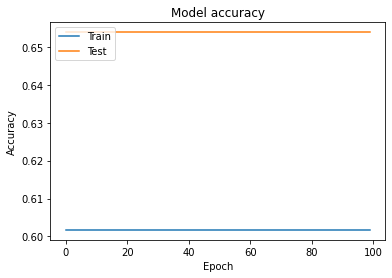

In [25]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

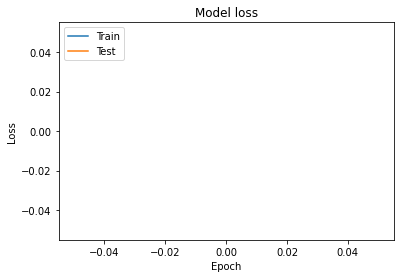

In [24]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()